### 시작하기에 앞서: matplotlib을 어떻게 발음하는가?
[HowToPronounce](http://www.howtopronounce.cc/matplotlib)

<br>

---

<br>

**시각화**는 특잇값을 찾아내거나, 데이터 변형이 필요한지 알아보거나, 모델에 대한 아이디어를 찾기 위한 과정의 일부이다.

**matplotlib**는 주로 2D그래프를 위한 데스크톱 패키지이다. MATLAB같은 plotting 방식을 제공한다.

[matplotlib 공식문서](https://matplotlib.org/stable/api/figure_api.html?highlight=add_subplot#matplotlib.figure.Figure.add_subplot)

# 9.1 matplotlib API 간략하게 살펴보기

In [1]:
import matplotlib.pyplot as plt

이미지, 사운드, 애니메이션 등으로 표현할 수 있는 객체를 셀 아래 inline으로 표시되게 해준다.

In [2]:
%matplotlib inline

### 기본 동작: plt.plot()로 그래프 그리기

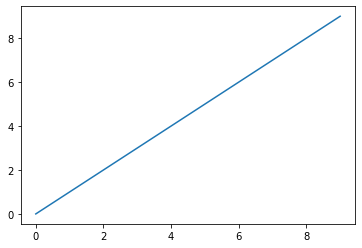

In [3]:
import numpy as np
data = np.arange(10)

plt.plot(data)                    # ndarray

### Figure객체 생성
matplotlib에서 그래프는 Figure객체 내에 존재한다.<br>
**plt.figure()**로 빈 Figure객체를 생성한다.

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

### Figure객체에 subplot생성
최소 하나 이상의 subplot이 있어야 그래프를 그릴 수 있다.<br>
Figure객체에 대하여 **addsubplot메소드**를 사용하여 subplot을 생성한다.

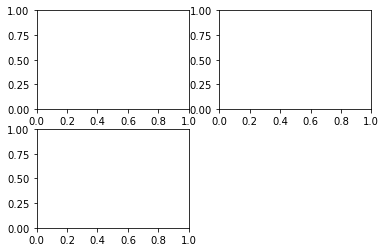

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)   # 2x2크기의 figure에 1번 위치에 subplot생성
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot으로 그래프를 그리면 **가장 최근의 figure와 subplot을 그린다.**<br>
👉 근데 왜 위에 2x2 figure에 그려지지 않았는가?

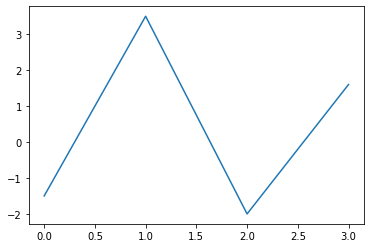

In [7]:
plt.plot([-1.5, 3.5, -2, 1.6])

### TIP
주피터 노트북에서는 **실행되는 셀마다 그래프가 리셋**된다.<br>
따라서 복잡한 그래프를 그릴 때는 단일 노트북 셀에 그래프를 그리는 코드를 전부 입력해야 한다.

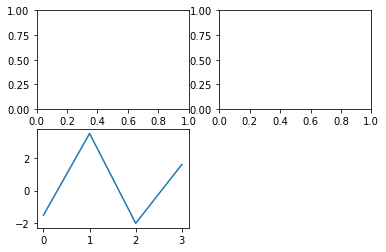

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot([-1.5, 3.5, -2, 1.6])

### 여러 개의 subplot을 포함하는 figure를 생성
이전에는 Figure객체를 생성 후 subplot을 하나씩 추가해줬다.<br>
**plt.subplots메소드**로 여러 개의 subplot을 포함하는 figure를 쉽게 생성할 수 있다.<br>
이 메소드는 **(Figure객체, subplot객체를 가진 ndarray)**를 반환한다.<br><br>
이 방법은 **subplot객체를 인덱싱하여 접근**할 수 있으므로 유용하다.<br>
ex) axes[0][0]

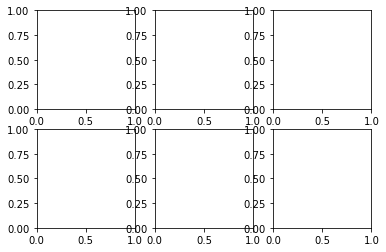

In [11]:
fig, axes = plt.subplots(2,3)    # 2x3크기의 figure를 생성

In [12]:
print(type(fig))
print(type(axes))
print(type(axes[0][0]))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


matplotlib은 각 그래프의 범위를 독립적으로 조정한다.<br>
그러나 subplots메소드의 옵션으로 **sharex 또는 sharey를 True**로 해주면 모든 subplot이 해당 축에 대해 같은 눈금을 사용한다.

### subplot 간의 간격 조절하기

함수 개요) <br>
$subplots\_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)$
- left, bottom, right, top은 subplot의 edge의 위치를 조정
- wspace와 hspace는 subplot의 주변을 padding

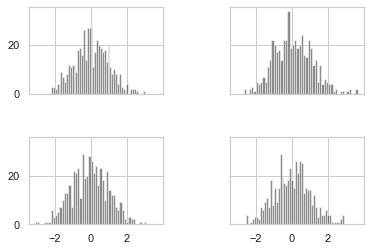

In [64]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)                       # 2x2의 figure, x축/y축 눈금 공유

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)   # 표준정규분포를 따르는 난수 500개 생성

# 간격 조정
plt.subplots_adjust(wspace=0.5, hspace=0.5)   # wspace와 hspace는 padding 역할

#plt.subplots_adjust(wspace=0, hspace=0)

### 그래프에 주석, 그림 추가하기
text, arrow, annotate함수를 이용한다.<br><br>
$Axes.text(self, x, y, s, fontdict=None, **kwargs)$
<br>
예) ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
<br><br>
$Axes.annotate(self, text, xy, *args, **kwargs)$
<br>
: Annotate the point xy with text text.

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

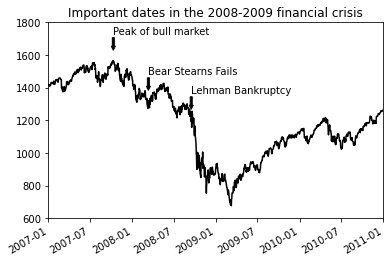

In [37]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)  # DataFrame
spx = data['SPX']   # Series
print(spx)

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),                       # 라벨을 추가할 좌표(x,y)
                xytext=(date, spx.asof(date) + 225),                         # 주석을 추가할 좌표(x,y)
                arrowprops=dict(facecolor='black', headwidth=4, width=2,     # xy와 xytext의 좌표 사이에 화살표를 그린다.
                                headlength=4),                               
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### matplotlib으로 일반적인 도형 그리기: patches객체

matplotlib.patches객체를 생성 후 **add_patch메소드**를 통해 subplot에 그린다.

<class 'matplotlib.patches.Rectangle'> <class 'matplotlib.patches.Circle'> <class 'matplotlib.patches.Polygon'>


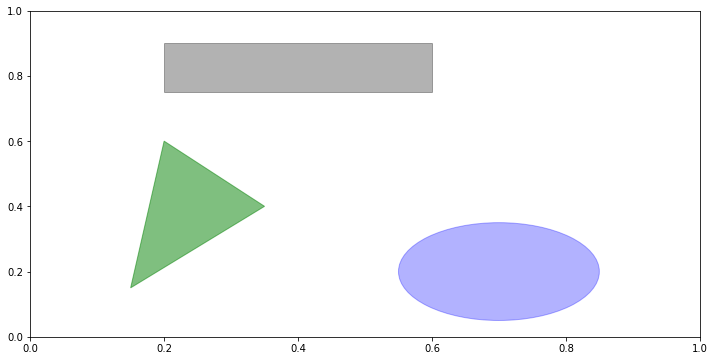

In [40]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

print(type(rect), type(circ), type(pgon))

# subplot에 add_patch를 호출
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 9.2 pandas에서 seaborn으로 그래프 그리기
matplotlib은 데이터를 어떤 그래프로 그릴지부터 범례, 제목, 눈금, 주석 같은 **기본 컴포넌트로 그래프를 작성**해야 하므로<br>
꽤 **저수준의 라이브러리**이다.

pandas에서 제공하는 Series와 Dataframe은 **내장메소드plot()**을 통해 쉽게 시각화할 수 있다.

<AxesSubplot:>

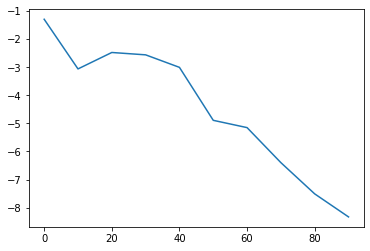

In [41]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10)) # Series객체 생성

s.plot()   # pandas의 내장메소드plot

막대그래프로도 표현가능

<AxesSubplot:>

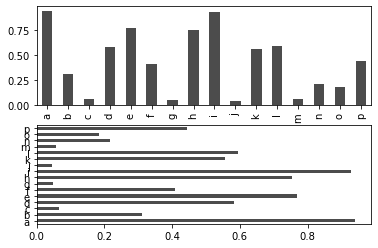

In [42]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

그래프를 그리기전에 요약을 해야하는 데이터는 **seaborn패키지**를 이용하면 훨씬 간단하게 처리할 수 있다.

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


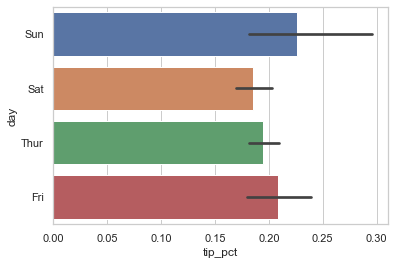

In [55]:
import seaborn as sns

tips = pd.read_csv('tips.csv')
print(tips.head())

# 새로운 열데이터를 추가한다.
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

# sns.set(style="whitegrid")

이외에도 seaborn을 통해 다양한 그래프를 그릴 수 있다.
- **sns.regplot**: 산포도와 선형회귀곡선을 함께 그린다.
- **sns.pairplot**: 산포도 행렬을 그린다. 변수 그룹간의 모든 산포도를 살펴볼 수 있다.

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


C:\Users\seenw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

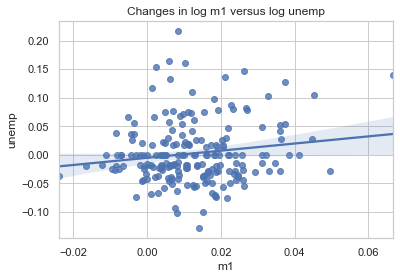

In [57]:
# 데이터 불러와서 처리
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
print(trans_data[-5:])

sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

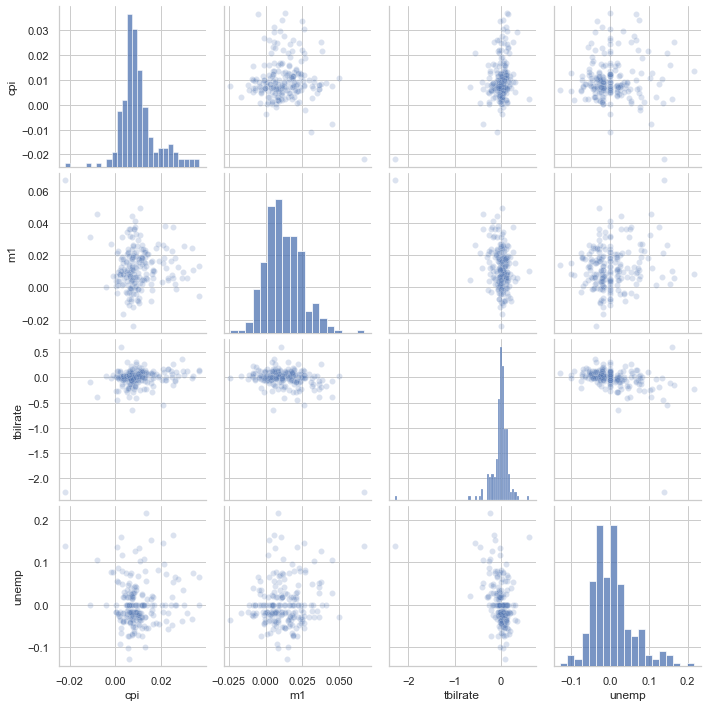

In [59]:
sns.pairplot(trans_data, plot_kws={'alpha': 0.2})

diag_kind옵션으로 대각선그래프 종류을 지정할 수 있다.

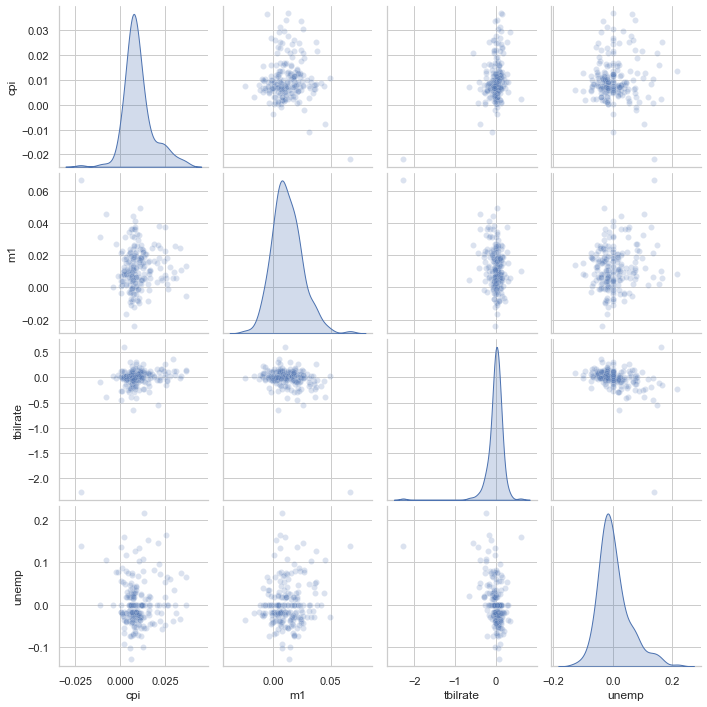

In [58]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})    # kde: 밀도그래프

### FacetGrid(패싯그리드)
- **다양한 범주형 값을 가지는 데이터를 시각화**하는데 좋은 방법
- **행, 열 방향으로 서로 다른 조건을 적용**하여 여러 개의 서브 플롯 제작
- 각 서브 플롯에 적용할 그래프 종류를 map() 메서드를 이용하여 그리드 객체에 전달

C:\Users\seenw\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


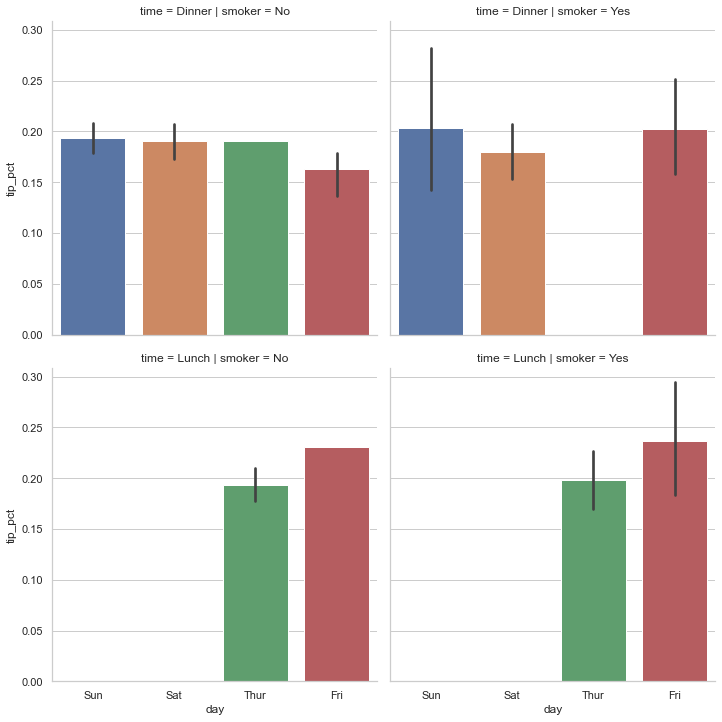

In [61]:
# "요일/시간/흡연 여부/시간에 따른 팁 비율"을 보여주는 그래프

# x축은 요일(범주)
# y축은 팁 비율(실수데이터)
# col은 열을 나누는 기준
# low는 행을 나누는 기준
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\seenw\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


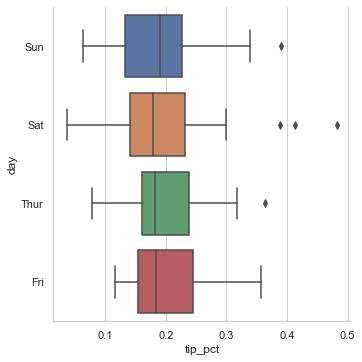

In [62]:
# "요일별 팁 비율에 대한 박스그래프"

# kind를 박스그래프로 지정
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## 9.3. 다른 파이썬 시각화 도구
- Bokeh(보케)
- Plotly(플로틀리)

👉 웹브라우저에서 파이썬으로 동적 대화형 그래프를 그릴 수 있다.

<br>

- matplotlib
- pandas
- seaborn

👉 웹이나 출판을 위한 정적 그래프를 생성할 때 적합하다.


<br>

---

<br>

### Bokeh(보케)
- Bokeh를 사용하면 JavaScript코드를 직접 작성하지 않고도 JavaScript기반 시각화를 만들 수 있다.
 - Bokeh는 JavaScrip 를 이용하는, HTML 기반 interactive plots을 그린다.
- JavaScript를 이용하기 때문에 plots 안에서 간단한 연산도 가능하며, 데이터의 변화에 따라 plots 이 업데이트 되기도 한다.
[참고1](https://diplabs.tistory.com/11)
[참고2: Bokeh vs Seaborn](https://lovit.github.io/visualization/2019/11/22/bokeh_tutorial/)

### Plotly(플로틀리)
-  플로틀리는 Python, R, MATLAB, Perl, Julia, Arduino 및 REST 용 과학 그래프 라이브러리 뿐만 아니라 개인 및 협업을 위한 온라인 그래프, 분석 및 통계 툴도 제공한다.
- 플롯은 공개, 비공개, 또는 비밀 세 가지 유형의 프라이버시 타입을 설정할 수 있다.
- 온라인으로 플로팅하면 플롯과 데이터가 클라우드 계정에 저장된다.
[참고](https://wooiljeong.github.io/python/python_plotly/)